<a href="https://colab.research.google.com/github/adams-gc/AI_SOLUTION_/blob/main/FakeMainAssignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pandas numpy matplotlib seaborn nltk scikit-learn tensorflow transformers

In [2]:
# !pip install tf-keras


In [ ]:
from tensorflow import keras
from transformers import BertTokenizer, TFBertForSequenceClassification


In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Transformer Model (BERT)
from transformers import BertTokenizer, TFBertForSequenceClassification

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load Dataset
df = pd.read_csv("fake.csv")  # Make sure the file is in the same directory
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print(df.shape)  # Rows, Columns
print(df.columns)  # Column Names


(23481, 4)
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text

# Apply cleaning
df["cleaned_text"] = df["text"].apply(clean_text)
df.head()


,title,text,subject,date,cleaned_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used his annual christmas day mes...


In [ ]:
nltk.download('punkt_tab', download_dir='/root/nltk_data')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words("english"))

# Function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["cleaned_text"] = df["cleaned_text"].apply(remove_stopwords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check if 'label' column exists before mapping
if 'label' in df.columns:
    # Assuming 'label' column has 'fake' and 'real' values
    df["label"] = df["label"].map({"fake": 1, "real": 0})
else:
    print("Warning: 'label' column not found in the DataFrame.")
    # Handle the missing 'label' column, e.g., add a default label or investigate data source

df.head()

,title,text,subject,date,cleaned_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish americans happy new year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used annual christmas day message...


In [ ]:
# Assuming the target variable is in the 'title' column
# and we want to classify titles containing 'trump' as '1' and others as '0'
df['label'] = df['title'].str.contains('trump', case=False).astype(int)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_text"], df["label"], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the Naïve Bayes model
nb_model = MultinomialNB()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Initialize Naïve Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Get predictions
y_pred_nb = nb_model.predict(X_test_tfidf)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Get predictions
y_pred_lr = lr_model.predict(X_test_tfidf)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(100, return_sequences=True),
    LSTM(50),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
# Define the parameter grid
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Perform GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', cv=5)
grid_search_nb.fit(X_train_tfidf, y_train)

# Get the best parameters and model
best_nb_model = grid_search_nb.best_estimator_
print("Best Parameters for Naïve Bayes:", grid_search_nb.best_params_)


Best Parameters for Naïve Bayes: {'alpha': 2.0}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try
}

# Perform GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5)
grid_search_lr.fit(X_train_tfidf, y_train)

# Get the best parameters and model
best_lr_model = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


Best Parameters for Logistic Regression: {'C': 10, 'solver': 'saga'}


In [ ]:
import keras_tuner as kt

def build_lstm_model(hp):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=hp.Int("embedding_dim", 64, 128, step=32), input_length=200),
        LSTM(hp.Int("lstm_units", 50, 150, step=50), return_sequences=True),
        LSTM(hp.Int("lstm_units2", 25, 100, step=25)),
        Dense(hp.Int("dense_units", 32, 128, step=32), activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=hp.Choice("learning_rate", [0.001, 0.0005, 0.0001])),
        metrics=['accuracy']
    )
    return model

# Initialize KerasTuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=5,
    directory='lstm_tuning',
    project_name='fake_news_lstm'
)

# Run the tuning
tuner.search(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters for LSTM:", best_hps.values)


Reloading Tuner from lstm_tuning\fake_news_lstm\tuner0.json
Best Hyperparameters for LSTM: {'embedding_dim': 64, 'lstm_units': 100, 'lstm_units2': 50, 'dense_units': 32, 'learning_rate': 0.0001}


In [ ]:
# LSTM Model Architecture after Hyperparameter Tuning
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=best_hps['embedding_dim'], input_length=200),
    LSTM(best_hps['lstm_units'], return_sequences=True),
    LSTM(best_hps['lstm_units2']),
    Dense(best_hps['dense_units'], activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=best_hps['learning_rate']), metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 66s 205ms/step - accuracy: 0.6451 - loss: 0.6418 - val_accuracy: 0.8463 - val_loss: 0.3654
Epoch 2/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 68s 232ms/step - accuracy: 0.8613 - loss: 0.3543 - val_accuracy: 0.8633 - val_loss: 0.3382
Epoch 3/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 81s 276ms/step - accuracy: 0.8898 - loss: 0.3004 - val_accuracy: 0.8733 - val_loss: 0.3265
Epoch 4/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 71s 242ms/step - accuracy: 0.9062 - loss: 0.2717 - val_accuracy: 0.8748 - val_loss: 0.3279
Epoch 5/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 75s 255ms/step - accuracy: 0.9132 - loss: 0.2563 - val_accuracy: 0.8725 - val_loss: 0.3335


In [ ]:
# Predictions
y_pred_nb = best_nb_model.predict(X_test_tfidf)
y_pred_lr = best_lr_model.predict(X_test_tfidf)
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")

147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step


In [ ]:
# Evaluation
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.7943368107302533
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2904
           1       0.75      0.70      0.72      1793

    accuracy                           0.79      4697
   macro avg       0.78      0.78      0.78      4697
weighted avg       0.79      0.79      0.79      4697



In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8750266127315308
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2904
           1       0.86      0.81      0.83      1793

    accuracy                           0.88      4697
   macro avg       0.87      0.86      0.87      4697
weighted avg       0.87      0.88      0.87      4697



In [ ]:
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

LSTM Accuracy: 0.8724717905045773
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2904
           1       0.81      0.87      0.84      1793

    accuracy                           0.87      4697
   macro avg       0.86      0.87      0.87      4697
weighted avg       0.88      0.87      0.87      4697



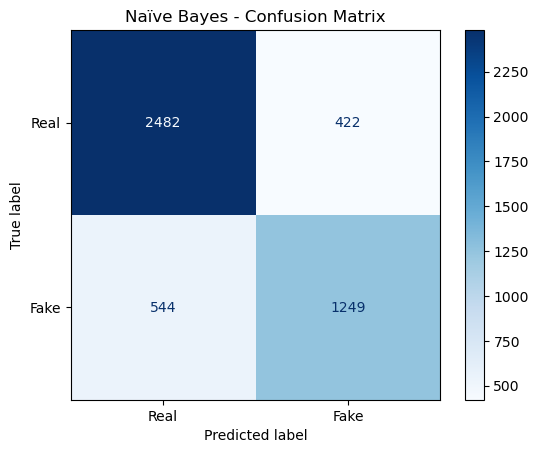

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Real', 'Fake'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naïve Bayes - Confusion Matrix")
plt.show()



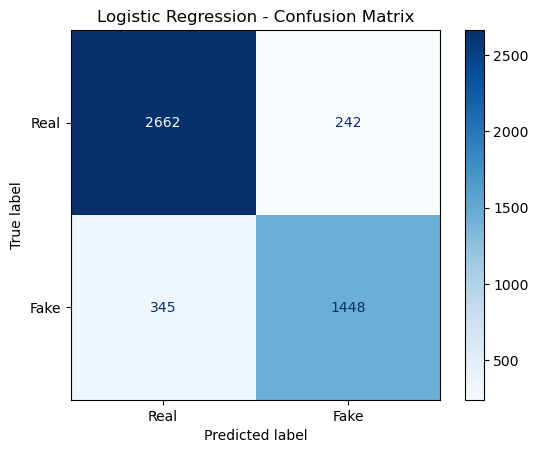

In [ ]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Real', 'Fake'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


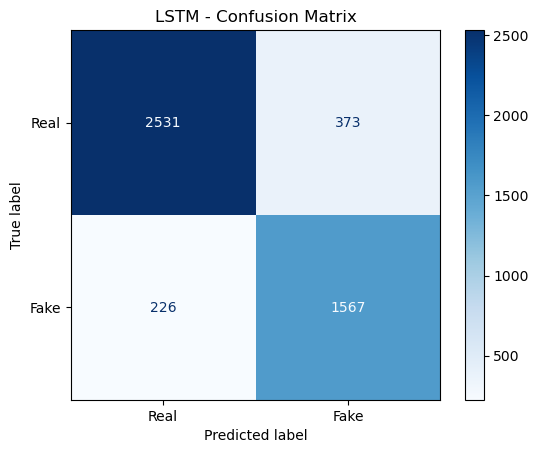

In [ ]:
# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['Real', 'Fake'])
disp_lstm.plot(cmap=plt.cm.Blues)
plt.title("LSTM - Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Collecting evaluation metrics for Naïve Bayes
nb_metrics = classification_report(y_test, y_pred_nb, output_dict=True)
# Collecting evaluation metrics for Logistic Regression
lr_metrics = classification_report(y_test, y_pred_lr, output_dict=True)
# Collecting evaluation metrics for LSTM
lstm_metrics = classification_report(y_test, y_pred_lstm, output_dict=True)

# Extracting relevant metrics (Accuracy, Precision, Recall, F1-Score)
models = ['Naïve Bayes', 'Logistic Regression', 'LSTM']

# Initialize lists to hold the metric values
accuracy = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_lstm)
]

precision_fake = [
    nb_metrics['0']['precision'],  # Assuming '0' represents Fake
    lr_metrics['0']['precision'],
    lstm_metrics['0']['precision']
]

precision_real = [
    nb_metrics['1']['precision'],  # Assuming '1' represents Real
    lr_metrics['1']['precision'],
    lstm_metrics['1']['precision']
]

recall_fake = [
    nb_metrics['0']['recall'],
    lr_metrics['0']['recall'],
    lstm_metrics['0']['recall']
]

recall_real = [
    nb_metrics['1']['recall'],
    lr_metrics['1']['recall'],
    lstm_metrics['1']['recall']
]

f1_fake = [
    nb_metrics['0']['f1-score'],
    lr_metrics['0']['f1-score'],
    lstm_metrics['0']['f1-score']
]

f1_real = [
    nb_metrics['1']['f1-score'],
    lr_metrics['1']['f1-score'],
    lstm_metrics['1']['f1-score']
]

# Creating a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision (Fake)': precision_fake,
    'Recall (Fake)': recall_fake,
    'F1-Score (Fake)': f1_fake,
    'Precision (Real)': precision_real,
    'Recall (Real)': recall_real,
    'F1-Score (Real)': f1_real
})

# Display the comparison DataFrame
print(comparison_df)


                 Model  Accuracy  Precision (Fake)  Recall (Fake)  \
0          Naïve Bayes  0.794337          0.820225       0.854683   
1  Logistic Regression  0.875027          0.885268       0.916667   
2                 LSTM  0.872472          0.918027       0.871556   

   F1-Score (Fake)  Precision (Real)  Recall (Real)  F1-Score (Real)  
0         0.837099          0.747457       0.696598         0.721132  
1         0.900694          0.856805       0.807585         0.831467  
2         0.894188          0.807732       0.873954         0.839539  


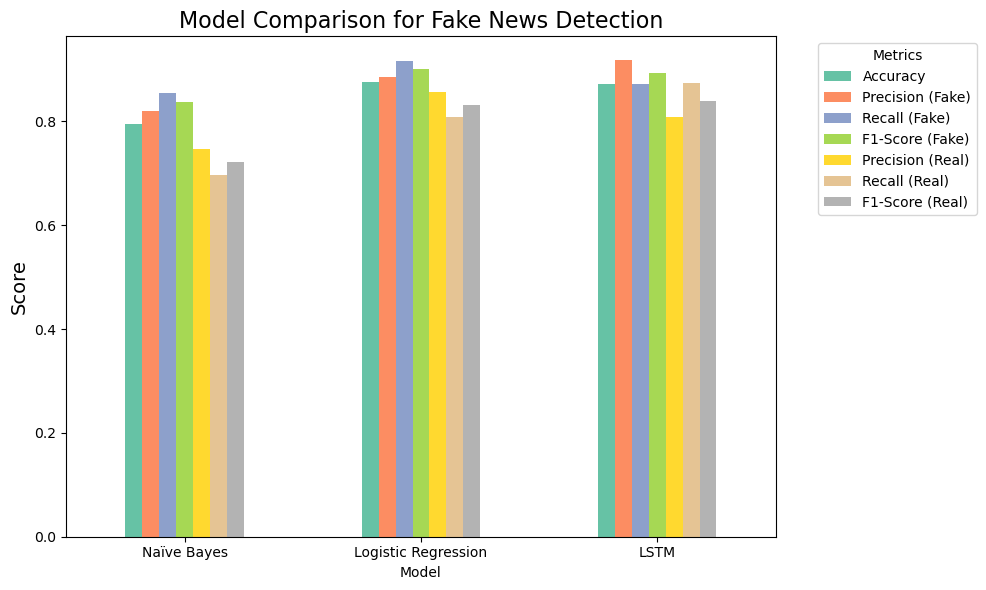

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the comparison
comparison_df.set_index('Model', inplace=True)
comparison_df.plot(kind='bar', figsize=(10,6), colormap='Set2')

# Adding titles and labels
plt.title('Model Comparison for Fake News Detection', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


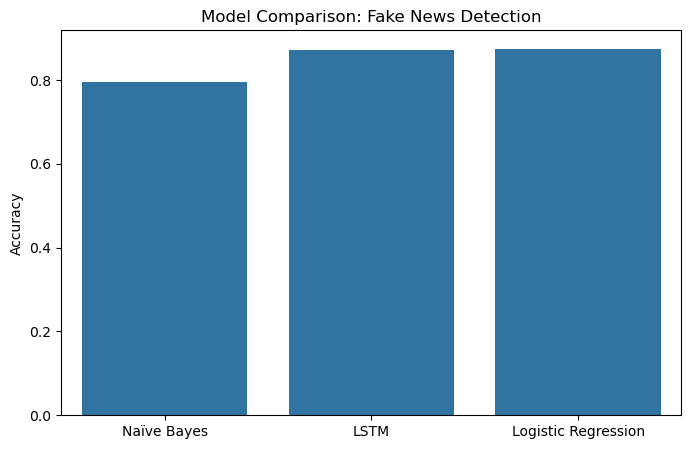

In [ ]:
models = ["Naïve Bayes", "LSTM", "Logistic Regression"]
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lstm), accuracy_score(y_test, y_pred_lr)]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Comparison: Fake News Detection")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# ROC Curve & AUC for Naïve Bayes, Logistic Regression, and LSTM
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)

auc_nb = auc(fpr_nb, tpr_nb)
auc_lr = auc(fpr_lr, tpr_lr)
auc_lstm = auc(fpr_lstm, tpr_lstm)

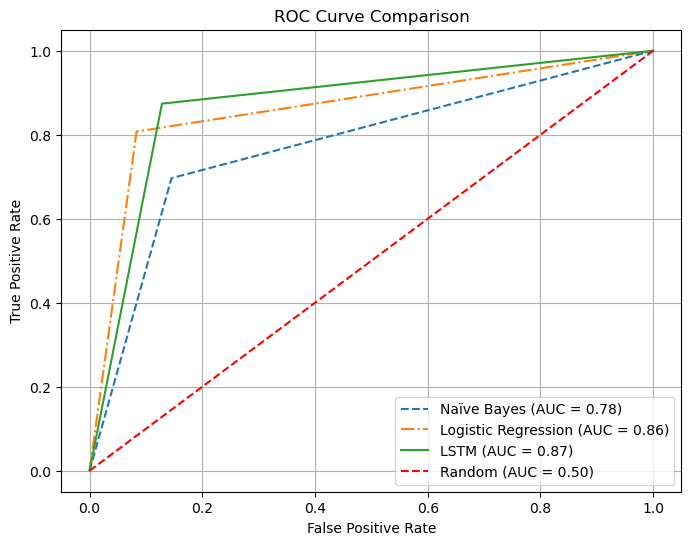

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})', linestyle='--')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', linestyle='-.')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], 'r--', label='Random (AUC = 0.50)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save LSTM Model in Keras format (.keras)
lstm_model.save('lstm_model.keras')


In [ ]:
import joblib

# Save Naïve Bayes Model
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Save Logistic Regression Model (if applicable)
joblib.dump(lr_model, 'logistic_regression_model.pkl')

# Save LSTM Model in Keras format (.keras)
lstm_model.save('lstm_model.keras')

print("Models saved successfully.")


Models saved successfully.
